In [2]:
import cv2
import matplotlib.pyplot as plt

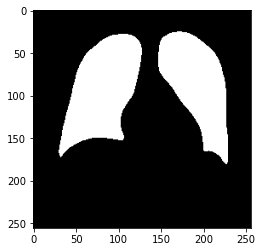

In [11]:
# 读取masks图片并将其转化为0-1矩阵
img_masks = cv2.imread("Normal-2-masks.png")
img_masks = cv2.cvtColor(img_masks, cv2.COLOR_BGR2GRAY)
img_masks[img_masks != 0] = 1
plt.imshow(img_masks, cmap="gray")

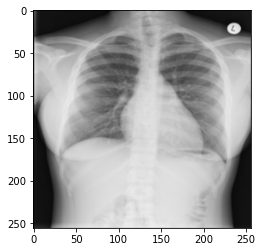

In [9]:
# 读取原图片并缩放为256*256尺寸的RGB图片
img = cv2.imread("Normal-2.png")
img = cv2.resize(img, (256, 256))
plt.imshow(img)

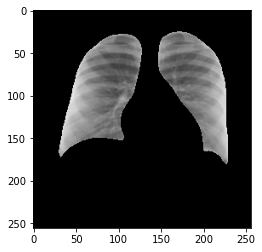

In [13]:
# masks与RGB图片相乘得到肺部RGB图片
img_seg = img_masks.reshape(256, 256, 1)*img
plt.imshow(img_seg)

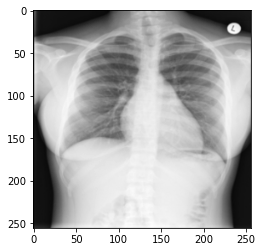

In [14]:
# 将图片转成灰度图
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")

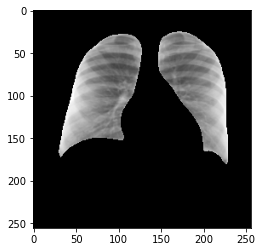

In [15]:
# masks与灰度图相乘得到肺部灰度图
img_gray_seg = img_masks*img_gray
plt.imshow(img_gray_seg, cmap="gray")

In [18]:
# 将肺部灰度图正位得到图像1
#img1 = img_gray_seg[:, (img_gray_seg != 0).any(axis=0)]
#img1 = img1[(img1 != 0).any(axis=1), :]
#plt.imshow(img1, cmap="gray")
img1 = img_gray_seg

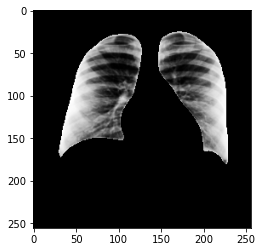

In [19]:
# 图像1进行直方图均衡化得到图像2
img2 = cv2.equalizeHist(img1)
plt.imshow(img2, cmap="gray")

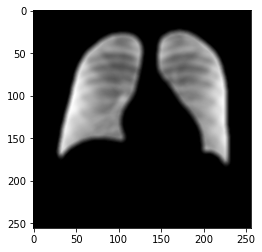

In [23]:
# 图像1进行双边滤波得到图像3
img3 = cv2.bilateralFilter(img1, d=8, sigmaColor=100000, sigmaSpace=100000)
plt.imshow(img3, cmap="gray")

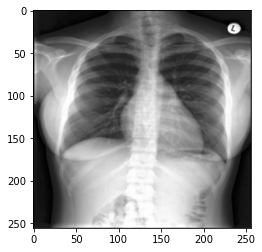

In [7]:
img = cv2.imread("Normal-2.png") # 画像読み込み
img = cv2.resize(img, (256, 256))
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # hsv票色系に変換
h, s, v = cv2.split(hsv) # 各成分に分割
result = cv2.equalizeHist(v)
hsv = cv2.merge((h, s, result))
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
plt.imshow(rgb)

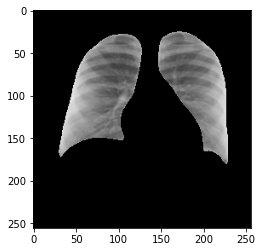

In [14]:
img = cv2.imread("Normal-2.png")
img = cv2.resize(img, (256, 256))
img = img/255
mask = cv2.imread("Normal-2-mask.png")
mask = cv2.resize(mask, (256, 256))
mask = mask/255
img_mask = img*mask
plt.imshow(img_mask)